## Developing a machine learning model to categorize the application requests as safe or not.

### Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading data

In [3]:
data = pd.read_json('C:/Users/User/Desktop/project/data.json')

In [4]:
data.head()

,req,isSafe
0,"{'baseUrl': '/crm/note', 'body': {'note': {'ti...",True
1,"{'baseUrl': '/crm/note', 'body': {'note': {'ti...",True
2,"{'baseUrl': '/crm/note', 'body': {'note': {'ti...",False
3,"{'baseUrl': '/crm/note', 'body': {'note': {'ti...",True
4,"{'baseUrl': '/crm/note', 'body': {'note': {'ti...",False


### Preparing Data

In [6]:
split_1 = pd.DataFrame([md for md in data.req])

In [7]:
split_1.head()

,baseUrl,body,fresh,headers,hostname,ip,ips,originalUrl,params,path,protocol,query,secure,stale,subdomains,xhr
0,/crm/note,"{'note': {'title': 'Tina Johnson', 'desc': 'To...",False,"{'host': 'example.com', 'user-agent': 'insomni...",example.com,::ffff:117.99.96.244,[],/crm/note,{},/note,http,{},False,True,[crm],False
1,/crm/note,"{'note': {'title': 'Clayton Cooper', 'desc': '...",False,"{'host': 'example.com', 'user-agent': 'insomni...",example.com,::ffff:117.99.96.244,[],/crm/note,{},/note,http,{},False,True,[crm],False
2,/crm/note,"{'note': {'title': 'Curtis Wolfe', 'desc': 'Tu...",False,"{'host': 'example.com', 'user-agent': 'insomni...",example.com,::ffff:117.99.96.244,[],/crm/note,{},/note,http,{},False,True,[crm],False
3,/crm/note,"{'note': {'title': 'Laura Fisher', 'desc': 'St...",False,"{'host': 'example.com', 'user-agent': 'insomni...",example.com,::ffff:117.99.96.244,[],/crm/note,{},/note,http,{},False,True,[crm],False
4,/crm/note,"{'note': {'title': 'Tyler Santos', 'desc': 'Us...",False,"{'host': 'example.com', 'user-agent': 'insomni...",example.com,::ffff:117.99.96.244,[],/crm/note,{},/note,http,{},False,True,[crm],False


In [8]:
split_2 = pd.DataFrame([md for md in split_1.body])

In [9]:
split_2

,note
0,"{'title': 'Tina Johnson', 'desc': 'Top recogni..."
1,"{'title': 'Clayton Cooper', 'desc': 'As possib..."
2,"{'title': 'Curtis Wolfe', 'desc': 'Tuesday Not..."
3,"{'title': 'Laura Fisher', 'desc': 'State third..."
4,"{'title': 'Tyler Santos', 'desc': 'Us enjoy si..."
...,...
995,"{'title': 'Bridget Elliott', 'desc': 'Recently..."
996,"{'title': 'James Rocha', 'desc': '<img src=1 h..."
997,"{'title': 'Jasmine Gibson', 'desc': 'Set natur..."
998,"{'title': 'Mr. Antonio Valdez DDS', 'desc': 'P..."


In [10]:
split_3= pd.DataFrame([md for md in split_2.note])

In [11]:
split_3

,title,desc
0,Tina Johnson,Top recognize eat. Fact whom spend area thing ...
1,Clayton Cooper,As possible American many prepare four strong....
2,Curtis Wolfe,Tuesday Notes or 2 like 2 XSP Class
3,Laura Fisher,State third represent energy campaign not forg...
4,Tyler Santos,Us enjoy since. Time identify image position o...
...,...,...
995,Bridget Elliott,Recently crime before five thought bit. Card f...
996,James Rocha,"<img src=1 href=1 onerror=""javascript:alert(1)..."
997,Jasmine Gibson,Set nature they then low resource truth. Edge ...
998,Mr. Antonio Valdez DDS,Push case them such face suffer. Letter middle...


In [12]:
split_4= pd.DataFrame([md for md in split_1.headers])

In [13]:
split_4

,host,user-agent,content-type,org_id,user_session_id,accept,content-length,user
0,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,"{'name': 'sam', 'role': 'sales1'}"
1,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,"{'name': 'sam', 'role': 'sales1'}"
2,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,"{'name': 'sam', 'role': 'sales1'}"
3,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,"{'name': 'sam', 'role': 'sales1'}"
4,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,"{'name': 'sam', 'role': 'sales1'}"
...,...,...,...,...,...,...,...,...
995,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,"{'name': 'sam', 'role': 'sales1'}"
996,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,"{'name': 'sam', 'role': 'sales1'}"
997,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,"{'name': 'sam', 'role': 'sales1'}"
998,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,"{'name': 'sam', 'role': 'sales1'}"


In [14]:
split_5 = pd.DataFrame([md for md in split_4.user])

In [15]:
split_5

,name,role
0,sam,sales1
1,sam,sales1
2,sam,sales1
3,sam,sales1
4,sam,sales1
...,...,...
995,sam,sales1
996,sam,sales1
997,sam,sales1
998,sam,sales1


In [16]:
new_data=pd.concat([data,split_1,split_2,split_3,split_4,split_5],axis=1)

In [17]:
new_data

,req,isSafe,baseUrl,body,fresh,headers,hostname,ip,ips,originalUrl,...,host,user-agent,content-type,org_id,user_session_id,accept,content-length,user,name,role
0,"{'baseUrl': '/crm/note', 'body': {'note': {'ti...",True,/crm/note,"{'note': {'title': 'Tina Johnson', 'desc': 'To...",False,"{'host': 'example.com', 'user-agent': 'insomni...",example.com,::ffff:117.99.96.244,[],/crm/note,...,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,"{'name': 'sam', 'role': 'sales1'}",sam,sales1
1,"{'baseUrl': '/crm/note', 'body': {'note': {'ti...",True,/crm/note,"{'note': {'title': 'Clayton Cooper', 'desc': '...",False,"{'host': 'example.com', 'user-agent': 'insomni...",example.com,::ffff:117.99.96.244,[],/crm/note,...,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,"{'name': 'sam', 'role': 'sales1'}",sam,sales1
2,"{'baseUrl': '/crm/note', 'body': {'note': {'ti...",False,/crm/note,"{'note': {'title': 'Curtis Wolfe', 'desc': 'Tu...",False,"{'host': 'example.com', 'user-agent': 'insomni...",example.com,::ffff:117.99.96.244,[],/crm/note,...,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,"{'name': 'sam', 'role': 'sales1'}",sam,sales1
3,"{'baseUrl': '/crm/note', 'body': {'note': {'ti...",True,/crm/note,"{'note': {'title': 'Laura Fisher', 'desc': 'St...",False,"{'host': 'example.com', 'user-agent': 'insomni...",example.com,::ffff:117.99.96.244,[],/crm/note,...,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,"{'name': 'sam', 'role': 'sales1'}",sam,sales1
4,"{'baseUrl': '/crm/note', 'body': {'note': {'ti...",False,/crm/note,"{'note': {'title': 'Tyler Santos', 'desc': 'Us...",False,"{'host': 'example.com', 'user-agent': 'insomni...",example.com,::ffff:117.99.96.244,[],/crm/note,...,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,"{'name': 'sam', 'role': 'sales1'}",sam,sales1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"{'baseUrl': '/crm/note', 'body': {'note': {'ti...",True,/crm/note,"{'note': {'title': 'Bridget Elliott', 'desc': ...",False,"{'host': 'example.com', 'user-agent': 'insomni...",example.com,::ffff:117.99.96.244,[],/crm/note,...,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,"{'name': 'sam', 'role': 'sales1'}",sam,sales1
996,"{'baseUrl': '/crm/note', 'body': {'note': {'ti...",False,/crm/note,"{'note': {'title': 'James Rocha', 'desc': '<im...",False,"{'host': 'example.com', 'user-agent': 'insomni...",example.com,::ffff:117.99.96.244,[],/crm/note,...,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,"{'name': 'sam', 'role': 'sales1'}",sam,sales1
997,"{'baseUrl': '/crm/note', 'body': {'note': {'ti...",True,/crm/note,"{'note': {'title': 'Jasmine Gibson', 'desc': '...",False,"{'host': 'example.com', 'user-agent': 'insomni...",example.com,::ffff:117.99.96.244,[],/crm/note,...,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,"{'name': 'sam', 'role': 'sales1'}",sam,sales1
998,"{'baseUrl': '/crm/note', 'body': {'note': {'ti...",True,/crm/note,"{'note': {'title': 'Mr. Antonio Valdez DDS', '...",False,"{'host': 'example.com', 'user-agent': 'insomni...",example.com,::ffff:117.99.96.244,[],/crm/note,...,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,"{'name': 'sam', 'role': 'sales1'}",sam,sales1


In [18]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   req              1000 non-null   object
 1   isSafe           1000 non-null   bool  
 2   baseUrl          1000 non-null   object
 3   body             1000 non-null   object
 4   fresh            1000 non-null   bool  
 5   headers          1000 non-null   object
 6   hostname         1000 non-null   object
 7   ip               1000 non-null   object
 8   ips              1000 non-null   object
 9   originalUrl      1000 non-null   object
 10  params           1000 non-null   object
 11  path             1000 non-null   object
 12  protocol         1000 non-null   object
 13  query            1000 non-null   object
 14  secure           1000 non-null   bool  
 15  stale            1000 non-null   bool  
 16  subdomains       1000 non-null   object
 17  xhr              1000 non-null   b

In [31]:
final=new_data.drop(['req','body','headers','user','note'], axis = 1) 

In [20]:
final

,isSafe,baseUrl,fresh,hostname,ip,ips,originalUrl,params,path,protocol,...,desc,host,user-agent,content-type,org_id,user_session_id,accept,content-length,name,role
0,True,/crm/note,False,example.com,::ffff:117.99.96.244,[],/crm/note,{},/note,http,...,Top recognize eat. Fact whom spend area thing ...,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,sam,sales1
1,True,/crm/note,False,example.com,::ffff:117.99.96.244,[],/crm/note,{},/note,http,...,As possible American many prepare four strong....,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,sam,sales1
2,False,/crm/note,False,example.com,::ffff:117.99.96.244,[],/crm/note,{},/note,http,...,Tuesday Notes or 2 like 2 XSP Class,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,sam,sales1
3,True,/crm/note,False,example.com,::ffff:117.99.96.244,[],/crm/note,{},/note,http,...,State third represent energy campaign not forg...,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,sam,sales1
4,False,/crm/note,False,example.com,::ffff:117.99.96.244,[],/crm/note,{},/note,http,...,Us enjoy since. Time identify image position o...,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,sam,sales1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,True,/crm/note,False,example.com,::ffff:117.99.96.244,[],/crm/note,{},/note,http,...,Recently crime before five thought bit. Card f...,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,sam,sales1
996,False,/crm/note,False,example.com,::ffff:117.99.96.244,[],/crm/note,{},/note,http,...,"<img src=1 href=1 onerror=""javascript:alert(1)...",example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,sam,sales1
997,True,/crm/note,False,example.com,::ffff:117.99.96.244,[],/crm/note,{},/note,http,...,Set nature they then low resource truth. Edge ...,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,sam,sales1
998,True,/crm/note,False,example.com,::ffff:117.99.96.244,[],/crm/note,{},/note,http,...,Push case them such face suffer. Letter middle...,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,sam,sales1


In [21]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   isSafe           1000 non-null   bool  
 1   baseUrl          1000 non-null   object
 2   fresh            1000 non-null   bool  
 3   hostname         1000 non-null   object
 4   ip               1000 non-null   object
 5   ips              1000 non-null   object
 6   originalUrl      1000 non-null   object
 7   params           1000 non-null   object
 8   path             1000 non-null   object
 9   protocol         1000 non-null   object
 10  query            1000 non-null   object
 11  secure           1000 non-null   bool  
 12  stale            1000 non-null   bool  
 13  subdomains       1000 non-null   object
 14  xhr              1000 non-null   bool  
 15  title            1000 non-null   object
 16  desc             1000 non-null   object
 17  host             1000 non-null   o

### Checking unique Values

In [23]:
column_values = final[["isSafe", "baseUrl","fresh","hostname","path","protocol","secure","stale","xhr","title","desc","host","user-agent","content-type","org_id","user_session_id","accept","content-length","name","role"]].values.ravel()
unique_values =  pd.unique(column_values)

In [24]:
unique_values

array([True, '/crm/note', False, ...,
       'Push case them such face suffer. Letter middle term each. Country myself all sell audience upon field.\nCover page stay civil human. Oil management opportunity exist body candidate board.',
       'Brian Stephens',
       'Family ready stay rule full than yet. Moment our house onto behind.'],
      dtype=object)

### Also we can use for loop
#### But we need to drop our list and dict columns to find unique values

In [32]:
final=final.drop(['ips','subdomains','query','params'],axis=1)

In [33]:
for col in final:
    print(final[col].unique())

[ True False]
['/crm/note']
[False]
['example.com']
['::ffff:117.99.96.244']
['/crm/note']
['/note']
['http']
[False]
[ True]
[False]
['Tina Johnson' 'Clayton Cooper' 'Curtis Wolfe' 'Laura Fisher'
 'Tyler Santos' 'Tracy Smith' 'Kevin Gonzalez' 'Jacob Martin'
 'Colleen Riggs' 'Keith Campos' 'Jerry Webster' 'Jacob Clements'
 'James Taylor' 'Ricky Wright' 'Gary Brooks' 'Catherine Rivera'
 'Christina Thomas' 'William Decker' 'Michael Patterson' 'Andre Brown'
 'Mrs. Christina Armstrong' 'Audrey Smith' 'Christine Todd'
 'Madeline Jackson' 'Samuel Wallace' 'Marcus Gregory' 'Brian Dominguez'
 'Robert Weber' 'Jennifer Williams' 'Emily Cain' 'Lisa Campos'
 'Brandon Harris' 'John Olsen' 'Kevin Jones' 'Mackenzie Browning'
 'Mr. Robert Myers' 'Carmen Alexander' 'Janice Rojas' 'Natalie Casey'
 'Lindsey Johnson' 'Melissa Johnson' 'Kathryn Reilly' 'Sandra Collins'
 'Danielle Roberts' 'Steven Tucker' 'Joshua Cole' 'Antonio Ramos'
 'Dylan Johnson' 'Jeffrey Hatfield PhD' 'David Mckay' 'Steve Jensen Jr.'


### Looking at our data we can see that we have same value for baseURL, fresh and headers. The only data changing is title, desc and our output that is isSafe.
### So irrespective of baseURL, fresh and headers, the user is categorized safe or not safe based on changing data that is title and description. 
### To develop a model we will use the columns which decide the user as safe or not safe. The required columns are desc and our output column isSafe. Because even though we have same baseURL,fresh and headers for our new user it can be categorized based on title and desc. Also the title does not play a major role as title can be any name which does not help us to categorize.

In [34]:
req_cols=final[["desc","isSafe"]]

In [35]:
req_cols

,desc,isSafe
0,Top recognize eat. Fact whom spend area thing ...,True
1,As possible American many prepare four strong....,True
2,Tuesday Notes or 2 like 2 XSP Class,False
3,State third represent energy campaign not forg...,True
4,Us enjoy since. Time identify image position o...,False
...,...,...
995,Recently crime before five thought bit. Card f...,True
996,"<img src=1 href=1 onerror=""javascript:alert(1)...",False
997,Set nature they then low resource truth. Edge ...,True
998,Push case them such face suffer. Letter middle...,True


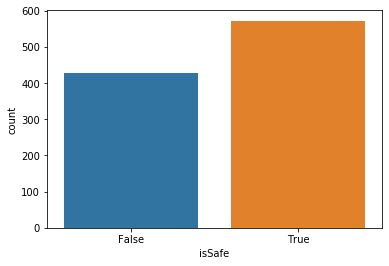

In [36]:
sns.countplot(req_cols['isSafe'])

### From the count we can say that our data is balanced.

### Preparing our input data

In [37]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [38]:
import nltk

In [39]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
desc_bow=CountVectorizer().fit_transform(req_cols['desc'])

In [43]:
desc_bow

<1000x1003 sparse matrix of type '<class 'numpy.int64'>'
	with 18168 stored elements in Compressed Sparse Row format>

### Splitting data into train and test

In [44]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test=train_test_split(desc_bow,req_cols['isSafe'],test_size=0.3, random_state=0)

### We will develop different models and check the model with better accuracy

## SVM

In [47]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [48]:
model = svm.SVC()
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [49]:
svm_predict=model.predict(X_test)

In [50]:
svm_predict

array([ True,  True, False,  True, False, False,  True, False, False,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False,  True,  True, False,  True,  True, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True, False,  True, False,  True,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,

### Classification report, Confusion matrix and accuracy score for SVM

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [54]:
print(classification_report(y_test,svm_predict))

              precision    recall  f1-score   support

       False       1.00      0.59      0.74       124
        True       0.78      1.00      0.87       176

    accuracy                           0.83       300
   macro avg       0.89      0.79      0.81       300
weighted avg       0.87      0.83      0.82       300



In [55]:
print('Confusion Matrix: \n',confusion_matrix(y_test,svm_predict))

Confusion Matrix: 
 [[ 73  51]
 [  0 176]]


In [79]:
svm_acc=accuracy_score(y_test,svm_predict)

In [80]:
print('Accuracy is',svm_acc)

Accuracy is 0.83


### To improve our model we can tune parameters. We can use GridSearchCV for selecting better value for our parametres.

## Naive Bayes

In [57]:
from sklearn.naive_bayes import MultinomialNB

In [58]:
classifier = MultinomialNB().fit(X_train,y_train)

In [59]:
nb_predict=classifier.predict(X_test)
nb_predict

array([ True,  True, False,  True, False, False,  True, False, False,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False,  True,  True, False,  True,  True, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True, False,  True, False,  True,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,

### Classification report, Confusion matrix and accuracy score for Naive Bayes

In [60]:
print(classification_report(y_test,nb_predict))

              precision    recall  f1-score   support

       False       1.00      0.59      0.74       124
        True       0.78      1.00      0.87       176

    accuracy                           0.83       300
   macro avg       0.89      0.79      0.81       300
weighted avg       0.87      0.83      0.82       300



In [61]:
print('Confusion Matrix: \n',confusion_matrix(y_test,nb_predict))

Confusion Matrix: 
 [[ 73  51]
 [  0 176]]


In [82]:
nb_acc=accuracy_score(y_test,nb_predict)

In [83]:
print('Accuracy is',nb_acc)

Accuracy is 0.83


## Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [66]:
rf_predict=rf_classifier.predict(X_test)

### Classification report, Confusion matrix and accuracy score for Random Forest Classifer

In [67]:
print(classification_report(y_test,rf_predict))

              precision    recall  f1-score   support

       False       0.75      0.64      0.69       124
        True       0.77      0.85      0.81       176

    accuracy                           0.76       300
   macro avg       0.76      0.74      0.75       300
weighted avg       0.76      0.76      0.76       300



In [68]:
print('Confusion Matrix: \n',confusion_matrix(y_test,rf_predict))

Confusion Matrix: 
 [[ 79  45]
 [ 26 150]]


In [84]:
rf_acc=accuracy_score(y_test,rf_predict)

In [85]:
print('Accuracy is',rf_acc)

Accuracy is 0.7633333333333333


## Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
lr_predict = logistic_regressor.predict(X_test)

### Classification report, Confusion matrix and accuracy score for Logistic Regression

In [76]:
print(classification_report(y_test,lr_predict))

              precision    recall  f1-score   support

       False       0.77      0.61      0.68       124
        True       0.76      0.87      0.81       176

    accuracy                           0.76       300
   macro avg       0.76      0.74      0.75       300
weighted avg       0.76      0.76      0.76       300



In [77]:
print('Confusion Matrix: \n',confusion_matrix(y_test,lr_predict))

Confusion Matrix: 
 [[ 76  48]
 [ 23 153]]


In [86]:
lr_acc=accuracy_score(y_test,lr_predict)

In [87]:
print('Accuracy is',lr_acc)

Accuracy is 0.7633333333333333


## Comparing Accuracies of different models

In [88]:
pd.DataFrame([[svm_acc,nb_acc,rf_acc,lr_acc]],columns=['SVM','Naive Bayes','Random Forest','Logistic Regression'],index=['Accuracy'])

,SVM,Naive Bayes,Random Forest,Logistic Regression
Accuracy,0.83,0.83,0.763333,0.763333
